<h2 style="text-align: center;"><b>Распознавание рукописных символов: MNIST</b></h2>

## Библиотека Keras

Основные возможности

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Keras_logo.svg/250px-Keras_logo.svg.png" width="200">

* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей)

* **Keras**  - удобный "пользовательский интерфейс" для более низкоуровневых библиотек (например, TensorFlow) 

* Основные принципы: 
    1. Удобство использования
    2. Модульность
    3. Масштабируемость
    4. Работа с Python
    
Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.

**keras** - одна из самых популярных библиотек для глубинного обучения 
(надстройка над другими библиотеками).

**keras** использует библиотеку **tensorflow** от Google, которая позволяет строить нейронные сети с высокой эффективностью и скоростью.
Именно поэтому сейчас **tensorflow** - наиболее популярная библиотека для глубинного обучения.

При необходимости при помощи менеджера пакетов питона `pip` выполните установку пакетов `tensorflow` и `keras`.

In [1]:
!pip install keras

  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.0 MB/s  0:00:0036m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 17.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 6.0 MB/s  0:00:00 eta 0:00:01
Using cached markdown_it_py-4.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [keras]32m8/9 [keras]wn-it-py]


In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.8/620.8 MB 2.6 MB/s  0:03:37m0:00:0100:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.6 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.3 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.3 MB/s  0:00:04m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 2.6 MB/s  0:00:09m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [tensorflow]5 [tensorflow]]]ata-server]


Построение нейронной сети для решения задачи классификации рукописных цифр
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Нам нужно распознать рукописные цифры по их изображениям. Так как цифр 10, то в нашей задаче классификации 10 классов. 

Набор данных MNIST часто используются для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

### Процесс анализа данных:
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестируем модель
6. Попробуем улучшить модель

Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для научных вычислений, `matplotlib` для построения графиков. 

* Наша нейронная сеть будет делать ряд последовательных преобразований входных данных, поэтому нам нужен тип нейронных сетей Sequential: импортируем его из раздела `keras.models`.

* Типы преобразований, с которыми мы будем работать: плотный слой Dense, активация Activation, преобразование картинки в длинный вектор Flatten. Каждое преобразование будет отдельным слоем в последовательной модели, поэтому импортируем их из `keras.layers`

Еще мы будем использовать данные MNIST - они тоже лежат прямо в `keras`, как достать этот датасет рассмотрим дальше.


In [3]:
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

# keras является оболочкой для более низкоуровневых библиотек, 
# в нашем случае мы используем tensorflow, у которого на данный момент 
# поддерживаются две версии, поскольку у нас уже установлена вторая,
# то просто будем ее использовать.

2025-12-02 23:05:47.792090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print("We're using TF", tf.__version__)
print("We are using Keras", keras.__version__)

We're using TF 2.20.0
We are using Keras 3.12.0


Обратим внимание, что вывод ячейки `Using TensorFlow backend.` - это означает, что в качестве бэкэнда используется библиотека для вычисления `tensorflow`.

### Дополнительная функция

Здесь написана дополнительная функция, необходимая для демонстрации каритнок из датасета

In [6]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N примеров каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    label_data : array
        Array of shape 
        (number_of_samples, )
        with labels
    classes : list
        list with classes names
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Number of samples for each class 
  """
  plt.figure(figsize=(10,N))
  num_classes = len(classes)
  for i, y in enumerate(classes):
      idxs = np.flatnonzero(label_data == y)
      idxs = np.random.choice(idxs, N, replace=False)
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

### 1. Загрузка данных. 

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [7]:
# Импортируем модуль датасета MNIST
from keras.datasets import mnist

In [8]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Посмотрим на содержание датасета, вызвав функцию `plot_MNIST_samples`,
которая строит на одной картинке **N** примеров из массива картинок
**X_train** для каждого класса

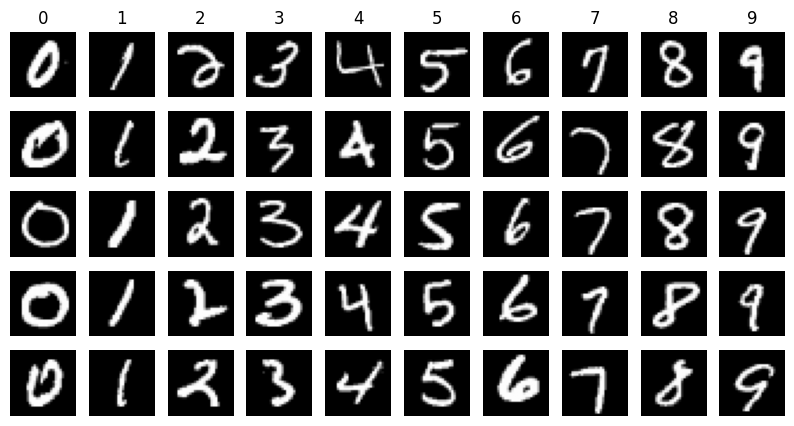

In [9]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=5)

In [10]:
x=X_train[10]
type(x)

numpy.ndarray

### 2. Подготовка данных 
**Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**




Для корректной работы нейронных сетей необходима предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от $0$ до $1$. 

При этом каждый пиксель картинки представлен в виде целого числа от $0$ до $255$ (для черно-белых картинок) и в виде набора из трех целых чисел от $0$ до $255$ для цветных.

Поэтому нормализацию картинки можно произвести простым делением на $255$.

Еще нейронной сети нужно значение выходной переменной в one-hot формате.

В текущий момент наша целевая переменная - это цифры от $0$ до $9$, то есть $10$ классов. Для каждой картинки наша сеть будет предсказывать вероятность принадлежности к каждому из этих десяти классов. 

Соответственно, истинным значением целевой переменной будет вектор длины $10$, состоящий из $0$ с одной $1$ на месте номера класса, к которому принадлежит картинка (то есть вероятность $1$, что цифра на самом деле принадлежит к конкретному классу).

Подобные действия выполняются функцией из `keras` `keras.utils.to_categorical`, которая принимает на вход исходный вектор значений выходной переменной и число классов.

In [11]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [14]:
X_train=X_train/255


In [15]:
X_test=X_test/255

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
X_train.min()

np.float64(0.0)

In [18]:
X_train.max()

np.float64(1.0)

In [20]:
from keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [22]:
y_test.shape

(10000, 10)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(60000, 10))

In [24]:
y_train.shape

(60000, 10)

In [25]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки (метод **shape**)

Для данных MNIST это изображения 28 на 28.

In [26]:
input_size = X_train[0].shape
input_size

(28, 28)

In [27]:
X_train.shape

(60000, 28, 28)

### 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [28]:
# Создаем пустую модель
model = Sequential()
model

<Sequential name=sequential, built=False>

In [30]:
# Этот слой превратит нашу двумерную картинку в вектор
model.add(Flatten(input_shape=input_size))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128))
#И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 10 нейронов
model.add(Dense(units=10))
# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

После описания архитектуры необходимо скомпилировать модель при помощи метода `compile`, указав минимизируемую функцию потерь (параметр `loss`), 
оптимизатор (параметр `optimizer`, который позаботится об изменении весов модели) и метрику (параметр `metrics`), по которой будет оцениваться точность работы на тестовой выборке в процессе обучения

In [31]:
from tensorflow.keras.optimizers import Adam

In [32]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy','mse'])

### 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки** 

Теперь задана структура модели и то, как мы будем ее обучать.
Обучаем ее аналогично `sklearn` - с помощью метода `fit`.

После запуска `fit` параметры оптимизируются градиентым спуском.
На каждом шаге градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.

Два дополнительных параметра для обучения:
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации = 40 
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

[Эксперименты](https://arxiv.org/abs/1609.04836) показывают, что выбор **batch_size** в диапазоне $32-512$ в среднем обеспечивает нормальную генерализационную способность нейросети, то есть помогает модели делать лучшие предсказания на новых данных, не присутствующих в тренировочной выборке. 

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке не стала убывать (то есть, не произошло переобучения). 

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

In [33]:
# обучаем модель, 5 эпох, размер батча 64
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10


2025-12-02 23:22:58.613695: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7136 - loss: 0.8640 - mse: 0.0394
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9441 - loss: 0.2321 - mse: 0.0089
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9634 - loss: 0.1421 - mse: 0.0057
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9721 - loss: 0.1054 - mse: 0.0043
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9770 - loss: 0.0832 - mse: 0.0035
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9818 - loss: 0.0658 - mse: 0.0028
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9845 - loss: 0.0551 - mse: 0.0024
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0461 - mse: 0.0021
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9887 - loss: 0.0400 - mse: 0.0018
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0354 - mse: 0.0016


Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,406 (1.20 MB)

 Trainable params: 104,468 (408.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208,938 (816.17 KB)

### 5. Валидация качества модели на тестовых данных.
Протестируем модель на тестовой выборке для этого используется метод `evaluate`.
Выводится **loss** и **точность**.

In [35]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10000, 10))

In [36]:
model.evaluate(X_test, y_test, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.1179 - mse: 0.0044


[0.11787230521440506, 0.9718000292778015, 0.004416615702211857]